# Connected filters

In this practical session, you will see how to use and design connected filters to filter images. 
We will mainly use three main ressources:

- the [morphology module](https://scikit-image.org/docs/dev/api/skimage.morphology.html) of the *Scikit* library which provides common morphological operators; 
- [Higra](https://github.com/higra/Higra) a Python package developped here, at the LIGM laboratory, which enables to easily design connected operators; and of course,
- [NumPy](https://numpy.org/), the basic multi-dimentional array representation.

### Instructions

Complete each section delimited by ``###  YOUR CODE HERE  ###`` and ``### END OF YOUR CODE ###``.
For each exercise, a set of tools is given: you must solve the exercise **with those tools and only those tools** (not all of them may be necessary).
Note that there can be multiple solutions.
NumPy functions can be used everywhere.

### Evaluation

Follow the instructions given by mail to send the completed notebook for evaluation.
The penalty for late work is $-2^{n-1}$ with $n$ the number of days late.

In [0]:
%%capture
!pip install higra

In [0]:
# a bit of setup
import numpy as np
import higra as hg
import skimage.morphology as morph
from skimage.measure import label
from imageio import imread, imwrite
from ipywidgets import interact, FloatSlider, IntSlider

try:
    from utils import * # imshow
except: # we are probably running from the cloud, try to fetch utils functions from URL
    import urllib.request as request; exec(request.urlopen('https://github.com/higra/Higra-Notebooks/raw/master/utils.py').read(), globals())

# Part 1 - Using connected filters

### Exercise 1.1 - Cleaning a binary image

The small white spots and black holes in the image bellow correspond to noise due to the acquisition process. They do not carry any information about the cells under study. Such noise is called (binary) salt and pepper noise or speckles. Exercice 1 is about removing salt and pepper noise from this image.

|                         *Input*                         |                         *Excepted result*                        |
|:-------------------------------------------------------:|:----------------------------------------------------------------:|
| ![input](https://www.esiee.fr/~perretb/MM/fig/cell.png) | ![input](https://www.esiee.fr/~perretb/MM/fig/result4CPrime.png) |

#### Tools

You can use the following tools:

- [morph.disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)
- [morph.dilation](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation)
- [morph.erosion](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.erosion)
- [morph.reconstruction](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.reconstruction) (marked connected opening)


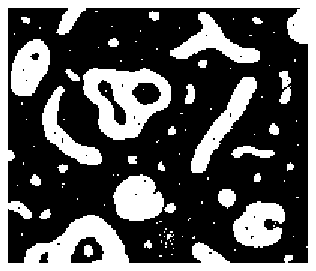

In [3]:
image = imread("https://www.esiee.fr/~perretb/MM/ex1/cell.pgm")

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

imshow(res, cmap='gray');

### Exercise 1.2 - Cleaning a binary image (again)

Same as exercise 1.1 with different tools.

#### Tools

You can use the following tools:

- [morph.area_closing](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.area_closing)
- [morph.area_opening](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.area_opening)

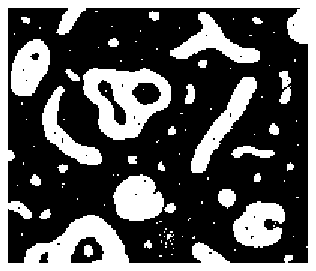

In [4]:
image = imread("https://www.esiee.fr/~perretb/MM/ex2/cell.pgm")

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

imshow(res, cmap='gray');

#### Tips and tricks

You have noticed that ``area_opening`` and ``area_closing`` both take a ``size`` parameter and it might be usefull to immediately see the effect of the filtering when the value of the ``size`` parameter is change. In Python notebooks, one can easily create interactive visualization to do this. 

The following cell demonstrates how to use the ``interact`` method to create such interactive vizualisation: try to play with the slider ``size`` and watch the effect on the image. Don't hesitate to use such tool when designing your filters.

In [5]:
# the function with the parameter that we want to be able to modify interactively, 
# note that the image, which is not an interactive parameter, is "captured" by the function 
def filter_image(size):
    res = morph.area_opening(image, size)
    imshow(res, cmap="gray");

# create a widget IntSlider that will call our function filter_image when changed
interact(filter_image, size=IntSlider(min=0, max=100, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='size'), Output()), _dom_classes…

### Exercise 1.3 - Denoising a gray level image

The input image has been corrupted by salt and pepper noise. The aim is to remove the noise from this image.

|                         *Input*                         |                         *Excepted result*                        |
|:-------------------------------------------------------:|:----------------------------------------------------------------:|
| ![input](https://www.esiee.fr/~perretb/MM/fig/s.png)    | ![input](https://www.esiee.fr/~perretb/MM/fig/s2.png)            |

#### Tools

You can use the following tools:

- [morph.disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)
- [morph.dilation](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation)
- [morph.erosion](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.erosion)
- [morph.reconstruction](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.reconstruction) (marked connected opening)


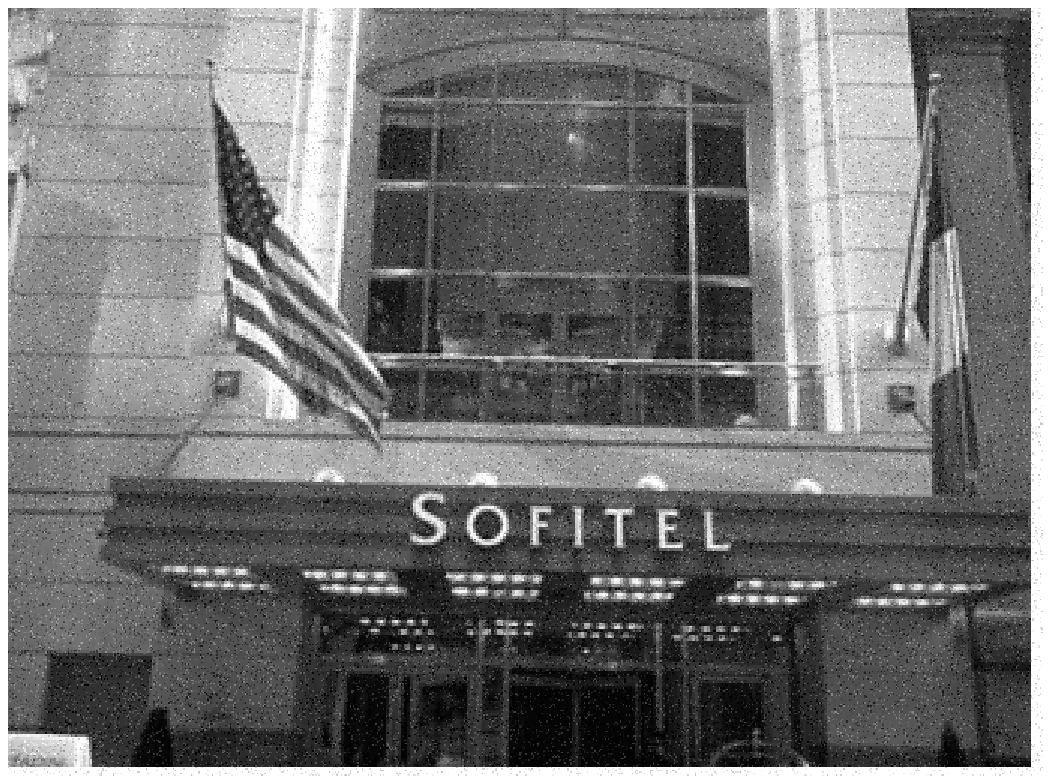

In [6]:
image = imread("https://www.esiee.fr/~perretb/MM/ex3/s.pgm")

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

imshow(res, cmap='gray');

### Exercise 1.4 - Denoising a gray level image  (again)

Same as exercise 1.3 with different tools.

#### Tools

You can use the following tools:

- [morph.area_closing](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.area_closing)
- [morph.area_opening](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.area_opening)

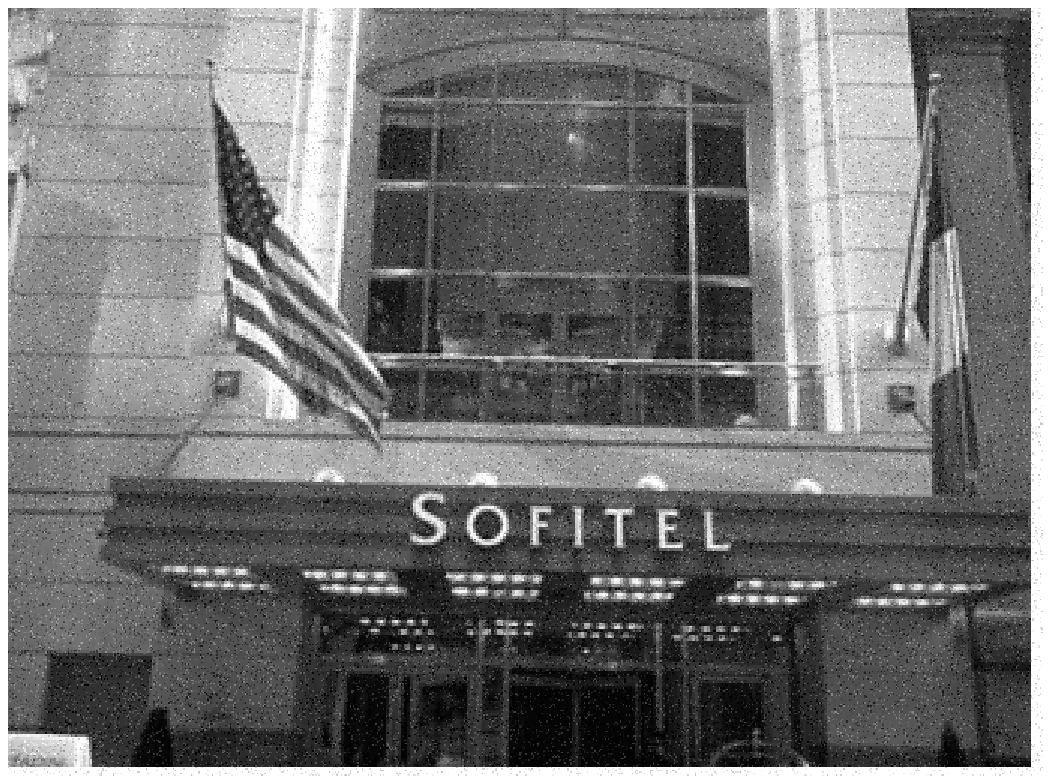

In [7]:
image = imread("https://www.esiee.fr/~perretb/MM/ex3/s.pgm")

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

imshow(res, cmap='gray');

### Exercise 1.5 - Reaching the nucleus

The input image contains cells (in white). The absence/presence/number of holes allows different kinds of cells to be distinguished. In particular abnormal cells appear without a nucleus or with a fragmented nucleus. The aim is to count the number of abnormal cells. 

|                         *Input*                                                   |                         *Normal cells*                        |
|:---------------------------------------------------------------------------------:|:----------------------------------------------------------------:|
| <img src="https://www.esiee.fr/~perretb/MM/fig/cell3.png" style="width: 300px;"/> | <img src="https://www.esiee.fr/~perretb/MM/fig/cellgood.png" style="width: 300px;"/>     |


This can be done by 

1. removing artifacts;
2. counting the number of components; 
3. filling all holes; 
4. taking the difference between the initial image and the one without holes; 
5. removing fragmented nucleii; and
6. counting number of components (the difference with 2 gives the result).

#### Tools

You can use the following tools:

- [morph.disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)
- [morph.dilation](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation)
- [morph.erosion](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.erosion)
- [morph.reconstruction](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.reconstruction) (marked connected opening)
- [morph.area_closing](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.area_closing)
- [morph.area_opening](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.area_opening)
- [label](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) 


In [8]:
image = imread("https://www.esiee.fr/~perretb/MM/ex5/cell3.pgm")

###  YOUR CODE HERE  ###
num_abnormal_cells = -1

### END OF YOUR CODE ###

print(num_abnormal_cells)

-1


# Part 2 - Designing connected filters

### Exercise 2.1 - Contructing the max-tree of an image

The construction of the max-tree of an image is done in two steps:

- define the graph representing the domain of the image; and
- compute the max-tree of this graph whose nodes are valued by the image pixel values.

Note that in Higra, a hierarchy such as the max-tree is always represented by two elements: 1) the tree by itself, and 2) the altitudes associated to each node of the tree. The altitudes is simply an array whose length is equal to the number of nodes in the tree.

Compute the max-tree of the following test image and verify that the result corresponds to what you computed manually before (the example is exactly the same as the one seen during the course).

#### Tools

You can use the following tools:

- [hg.get_4_adjacency_graph](https://higra.readthedocs.io/en/latest/python/graph_image.html#higra.get_4_adjacency_graph)
- [hg.component_tree_max_tree](https://higra.readthedocs.io/en/latest/python/component_tree.html#higra.component_tree_max_tree)

In [0]:
def print_max_tree(tree, altitudes, attribute=None):
    if attribute is None:
        attribute = altitudes
        
    hg.print_partition_tree(tree, altitudes=np.max(altitudes) - altitudes, attribute=attribute)

In [0]:
image = np.asarray([[1, 2, 1, 1, 1],
                    [0, 2, 0, 0, 0],
                    [0, 0, 0, 2, 9],
                    [6, 3, 0, 0, 0],
                    [8, 5, 0, 2, 1]])
tree, altitudes = None, None

###  YOUR CODE HERE  ###


### END OF YOUR CODE ###

if tree is not None and altitudes is not None:
    print_max_tree(tree, altitudes)

### Exercise 2.2 - Filtering a max-tree

Once the max-tree representing an image is computed, one can perform a filtering of this tree, guided by an attribute value, using the following steps:

- compute an attribute for each node of the tree; 
- compute which node has to be removed/kept depending on the attribute values; 
- remove the unwanted nodes from the tree; and
- reconstruct an image using the simplified tree.

Note that in Higra, attributes are, like altitudes, simple arrays.

Perform an area filter on the given test image, removing all components whose size is smaller or equal than 3.

#### Tools

You can use the following tools:

- [hg.get_4_adjacency_graph](https://higra.readthedocs.io/en/latest/python/graph_image.html#higra.get_4_adjacency_graph)
- [hg.component_tree_max_tree](https://higra.readthedocs.io/en/latest/python/component_tree.html#higra.component_tree_max_tree)
- [hg.attribute_area](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_area)
- [hg.simplify_tree](https://higra.readthedocs.io/en/latest/python/hierarchy_core.html#higra.simplify_tree)
- [hg.reconstruct_leaf_data](https://higra.readthedocs.io/en/latest/python/tree_algorithm.html#higra.reconstruct_leaf_data)

In [11]:
image = np.asarray([[1, 2, 1, 1, 1],
                    [0, 2, 0, 0, 0],
                    [0, 0, 0, 2, 9],
                    [6, 3, 0, 0, 0],
                    [8, 5, 0, 2, 1]])

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

print(res)

[[1 2 1 1 1]
 [0 2 0 0 0]
 [0 0 0 2 9]
 [6 3 0 0 0]
 [8 5 0 2 1]]


### Exercise 2.3 - Denoising a gray level image  (once again)

Same as exercise 1.3 but with your own crafted filter this time.

#### Tools

You can use the following tools:

- [hg.get_4_adjacency_graph](https://higra.readthedocs.io/en/latest/python/graph_image.html#higra.get_4_adjacency_graph)
- [hg.component_tree_max_tree](https://higra.readthedocs.io/en/latest/python/component_tree.html#higra.component_tree_max_tree)
- [hg.component_tree_min_tree](https://higra.readthedocs.io/en/latest/python/component_tree.html#higra.component_tree_min_tree)
- [hg.attribute_area](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_area)
- [hg.simplify_tree](https://higra.readthedocs.io/en/latest/python/hierarchy_core.html#higra.simplify_tree)
- [hg.reconstruct_leaf_data](https://higra.readthedocs.io/en/latest/python/tree_algorithm.html#higra.reconstruct_leaf_data)

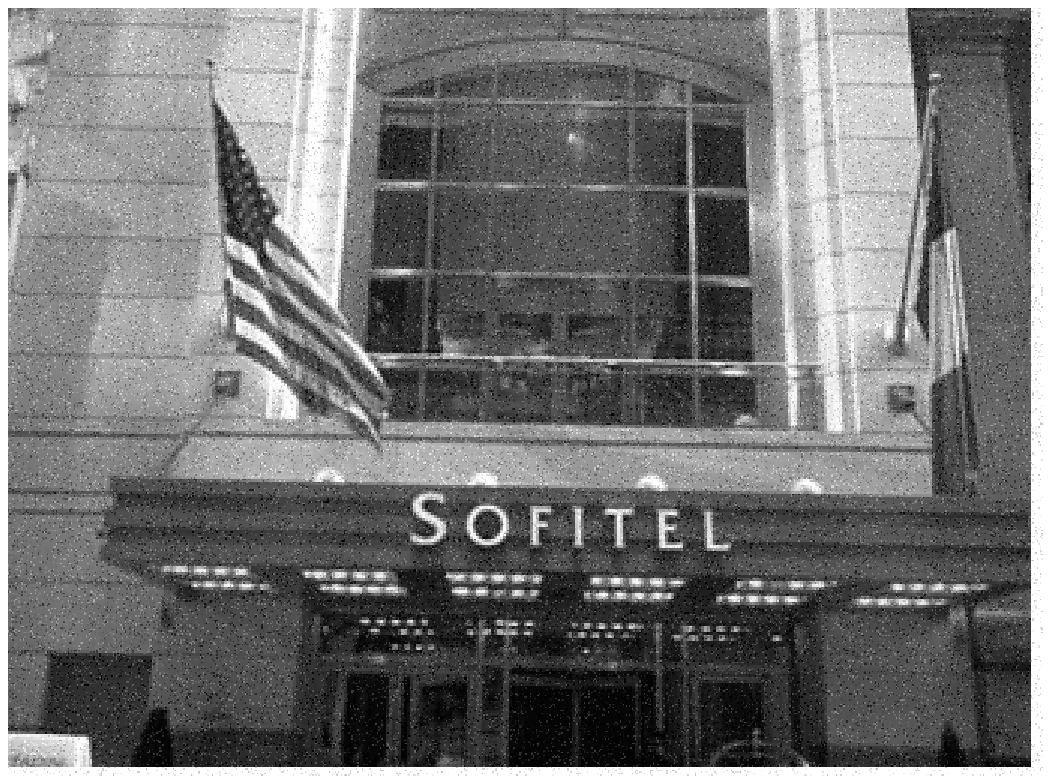

In [12]:
image = imread("https://www.esiee.fr/~perretb/MM/ex3/s.pgm")

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

imshow(res, cmap='gray');

### Exercise 2.4 - Cell segmentation

The input image represents a slice of a cell. In order to know whether this cell is sane or not, it is important to perform a geometrical analysis of the visible bright lobes. In order to perform such analysis, one usually starts by finding the spatial extension of these bright lobes. The aim is to extract the bright lobes of the image.


|                         *Input*                                                   |                         *Excepted result*                        |
|:---------------------------------------------------------------------------------:|:----------------------------------------------------------------:|
| <img src="https://www.esiee.fr/~perretb/MM/fig/cil.png" style="width: 300px;"/> | <img src="https://www.esiee.fr/~perretb/MM/fig/cilSeg.png" style="width: 300px;"/>     |




#### Tools

You can use the following tools:

- [hg.get_4_adjacency_graph](https://higra.readthedocs.io/en/latest/python/graph_image.html#higra.get_4_adjacency_graph)
- [hg.component_tree_max_tree](https://higra.readthedocs.io/en/latest/python/component_tree.html#higra.component_tree_max_tree)
- [hg.attribute_area](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_area)
- [hg.attribute_volume](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_volume)
- [hg.attribute_height](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_height)
- [hg.attribute_extrema](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_extrema)
- [hg.simplify_tree](https://higra.readthedocs.io/en/latest/python/hierarchy_core.html#higra.simplify_tree)
- [hg.reconstruct_leaf_data](https://higra.readthedocs.io/en/latest/python/tree_algorithm.html#higra.reconstruct_leaf_data)


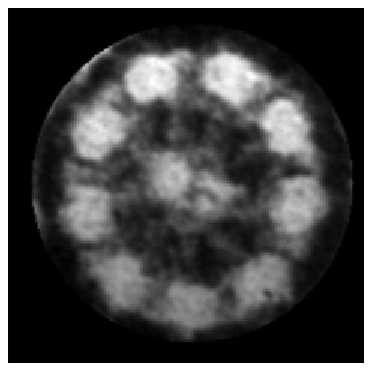

In [13]:
image = imread("https://www.esiee.fr/~perretb/MM/ex6/cil.pgm") / 255

###  YOUR CODE HERE  ###
res = image

### END OF YOUR CODE ###

imshow(res, cmap='gray');

### Exercise 2.5 - Galaxy analysis

The input image represents the spiral galaxy M51. Spiral galaxies are characterized by the presence of spiral arms which are regions of higher stars and dust density. Among those arms lye particular regions, called HII regions, where new stars are created. HII regions are the only places where massive young stars, which are very bright and short lived, can be found. HII regions are characterized by their blueish color (produced by the young massive stars) and their relatively small size. The goal of this exercise is to detect HII regions in the input image.


|                         *Input*                                                   |                         *Excepted result*                                              |
|:---------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------:|
| <img src="https://www.esiee.fr/~perretb/MM/fig/m51.png" style="width: 450px;"/>   | <img src="https://www.esiee.fr/~perretb/MM/fig/m51Seg.png" style="width: 450px;"/>     |

Note that this time, the input image is a colour image. However, we do not know how to compute a max-tree of colour. While more sofisticated solutions exist, a simple approach in this case is simply to convert the input image to grayscale. The input color image will then be used to compute the color of each component of the grayscale max-tree. 

Formally, the HII regions can be characterized with the following feature:

- their area is not too small to avoid noise;
- their area is not too large to avoid large scale structures; and
- their color is blue. Note that, to measure the blueness of an object in astronomy we usually consider the difference between the blue channel and the green channel: the larger the difference the bluer it is. 


#### Tools

You can use the following tools:

- [hg.get_4_adjacency_graph](https://higra.readthedocs.io/en/latest/python/graph_image.html#higra.get_4_adjacency_graph)
- [hg.component_tree_max_tree](https://higra.readthedocs.io/en/latest/python/component_tree.html#higra.component_tree_max_tree)
- [hg.attribute_area](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_area)
- [hg.attribute_mean_vertex_weights](https://higra.readthedocs.io/en/latest/python/tree_attributes.html#higra.attribute_mean_vertex_weights)
- [hg.simplify_tree](https://higra.readthedocs.io/en/latest/python/hierarchy_core.html#higra.simplify_tree)
- [hg.reconstruct_leaf_data](https://higra.readthedocs.io/en/latest/python/tree_algorithm.html#higra.reconstruct_leaf_data)


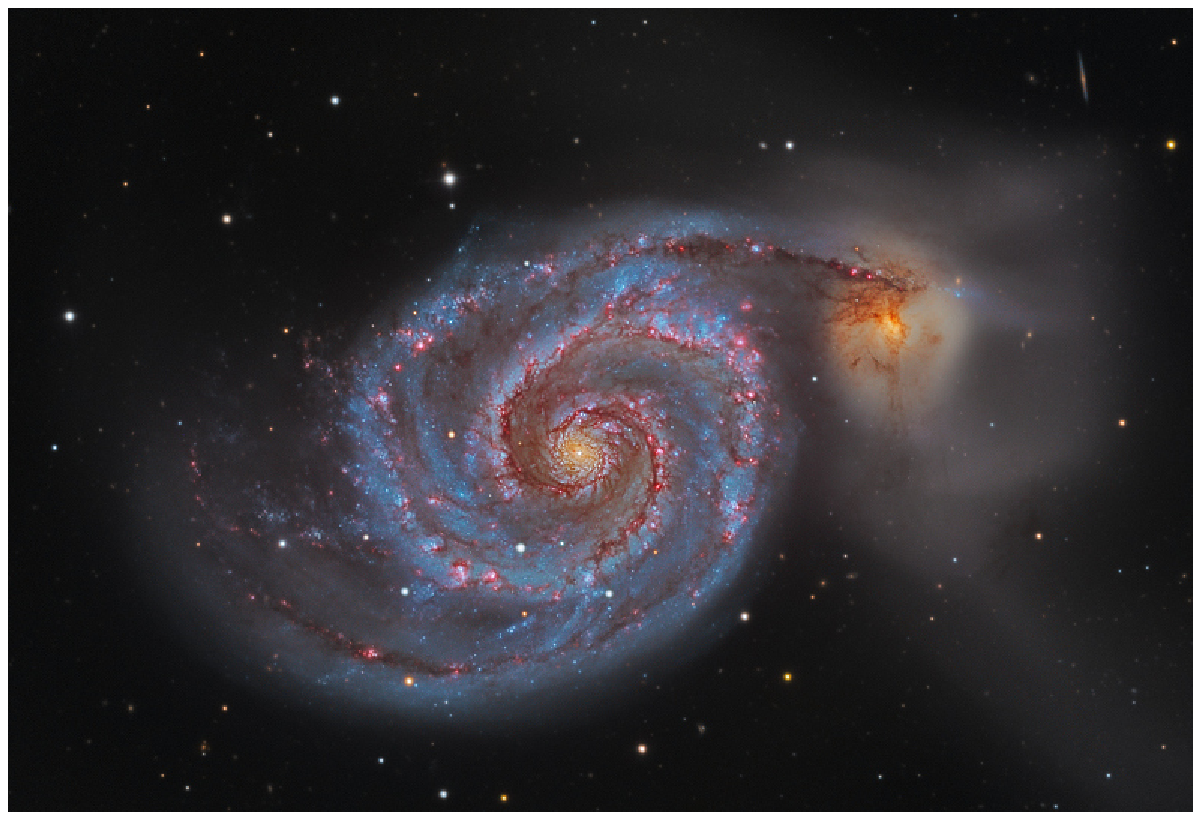

In [14]:
image_color = imread("https://www.esiee.fr/~perretb/MM/fig/m51.png") / 255

# greyscale image and normalization
image = np.mean(image_color, axis=2)
image = image - image.min()

###  YOUR CODE HERE  ###
res = np.zeros_like(image)


### END OF YOUR CODE ###

# detected regions will be displayed in red above the original image
res = (res > 0).astype(np.float64)
im = np.copy(image_color)
im[res > 0] = [1,0,0] 
imshow(im);